In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from wordcloud import WordCloud, STOPWORDS

In [2]:
dataset_dir = "/kaggle/input/liar-dataset"

tsv_files = [f for f in os.listdir(dataset_dir) if f.endswith(".tsv")]

In [3]:
file_path = os.path.join(dataset_dir, tsv_files[0])
print(f"Loading dataset: {file_path}")

df = pd.read_csv(file_path, sep="\t", header=None)
df.columns = [
    'id','label','statement','subject','speaker','job_title',
    'state_info','party_affiliation','barely_true_counts','false_counts',
    'half_true_counts','mostly_true_counts','pants_on_fire_counts','context'
]

print("Dataset loaded successfully!")
print("Shape:", df.shape)


Loading dataset: /kaggle/input/liar-dataset/test.tsv
Dataset loaded successfully!
Shape: (1267, 14)


In [4]:
print("Missing statements:", df["statement"].isnull().sum())


Missing statements: 0


In [5]:
df.dropna(subset=["statement"], inplace=True)

In [6]:
df["target"] = df["label"].apply(
    lambda x: 1 if x in ["true","mostly-true","half-true"] else 0
)

print("Binary target created ✔")

Binary target created ✔


([<matplotlib.axis.XTick at 0x78de683d39d0>,
 [Text(0, 0, 'Fake News'), Text(1, 0, 'Real News')])

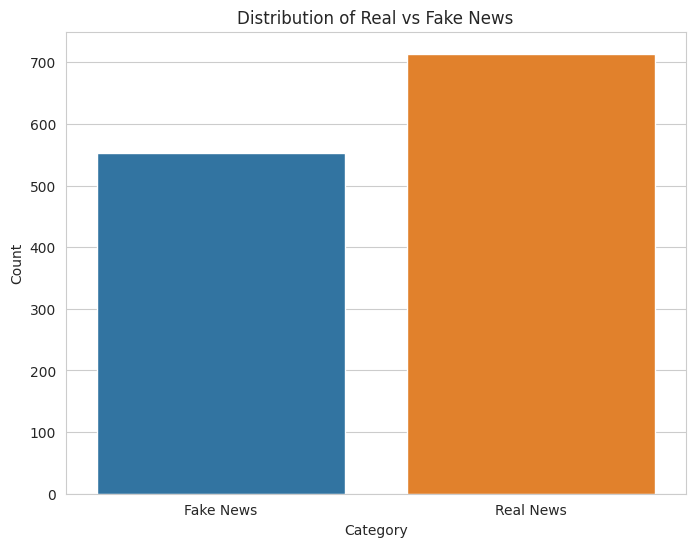

In [7]:
plt.figure(figsize=(8,6))
sns.set_style("whitegrid")

ax = sns.countplot(x="target", data=df)
plt.title("Distribution of Real vs Fake News")
plt.xlabel("Category")
plt.ylabel("Count")
plt.xticks([0,1], ["Fake News","Real News"])

In [8]:
for p in ax.patches:
    ax.annotate(
        str(p.get_height()), 
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='bottom'
    )

plt.show()


In [9]:
real_text = " ".join(df[df["target"]==1]["statement"])
fake_text = " ".join(df[df["target"]==0]["statement"])

Word counts -> Real: 13702 , Fake: 9616


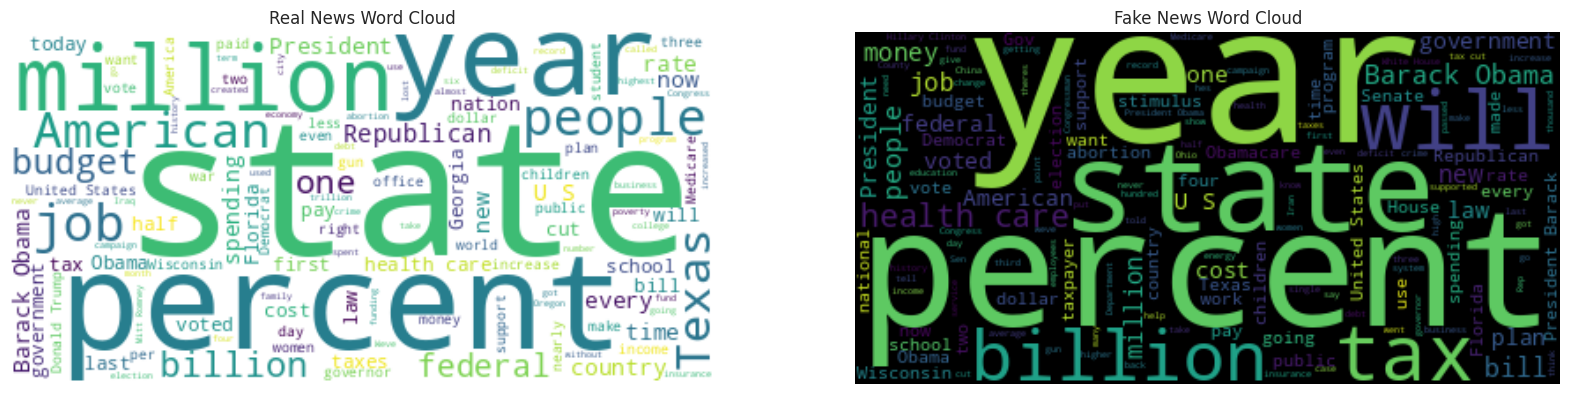

In [10]:
print("Word counts -> Real:", len(real_text.split()), ", Fake:", len(fake_text.split()))

stopwords = set(STOPWORDS)
stopwords.update(["says","said","saying"])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))

wc_real = WordCloud(stopwords=stopwords, background_color="white").generate(real_text)
wc_fake = WordCloud(stopwords=stopwords, background_color="black", colormap="viridis").generate(fake_text)

ax1.imshow(wc_real, interpolation="bilinear")
ax1.set_title("Real News Word Cloud")
ax1.axis("off")

ax2.imshow(wc_fake, interpolation="bilinear")
ax2.set_title("Fake News Word Cloud")
ax2.axis("off")

plt.show()


In [11]:
df

,id,label,statement,subject,speaker,job_title,state_info,party_affiliation,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,context,target
0,11972.json,true,Building a wall on the U.S.-Mexico border will...,immigration,rick-perry,Governor,Texas,republican,30,30,42,23,18,Radio interview,1
1,11685.json,false,Wisconsin is on pace to double the number of l...,jobs,katrina-shankland,State representative,Wisconsin,democrat,2,1,0,0,0,a news conference,0
2,11096.json,false,Says John McCain has done nothing to help the ...,"military,veterans,voting-record",donald-trump,President-Elect,New York,republican,63,114,51,37,61,comments on ABC's This Week.,0
3,5209.json,half-true,Suzanne Bonamici supports a plan that will cut...,"medicare,message-machine-2012,campaign-adverti...",rob-cornilles,consultant,Oregon,republican,1,1,3,1,1,a radio show,1
4,9524.json,pants-fire,When asked by a reporter whether hes at the ce...,"campaign-finance,legal-issues,campaign-adverti...",state-democratic-party-wisconsin,NaN,Wisconsin,democrat,5,7,2,2,7,a web video,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1262,7334.json,half-true,Says his budget provides the highest state fun...,education,rick-scott,Governor,Florida,republican,28,23,38,34,7,a news conference,1
1263,9788.json,barely-true,Ive been here almost every day.,"civil-rights,crime,criminal-justice",jay-nixon,Governor,Missouri,democrat,2,0,0,1,0,"on ABC's ""This Week""",0
1264,10710.json,barely-true,"In the early 1980s, Sen. Edward Kennedy secret...","bipartisanship,congress,foreign-policy,history",mackubin-thomas-owens,"senior fellow, Foreign Policy Research Institute",Rhode Island,columnist,1,0,0,0,0,a commentary in The Providence Journal,0
1265,3186.json,barely-true,Says an EPA permit languished under Strickland...,"environment,government-efficiency",john-kasich,"Governor of Ohio as of Jan. 10, 2011",Ohio,republican,9,8,10,18,3,a news conference,0


In [12]:
df.to_csv("cleaned_liar_dataset.csv", index=False)